In [54]:
# Jeff Dunagin
# DSC 530
# Exercise 4.2
# 9 January 2022

In [1]:
# imports
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

# 3.1

In [2]:
resp = nsfg.ReadFemResp()

In [3]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

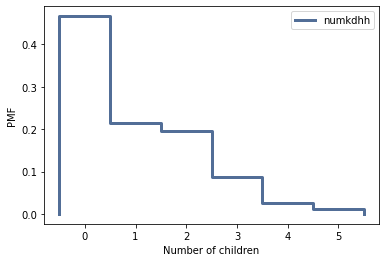

In [4]:
# plot the pmf for number of children in a household
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [5]:
# need a function to compute biased pmf
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [6]:
biased = BiasPmf(pmf, label='biased')

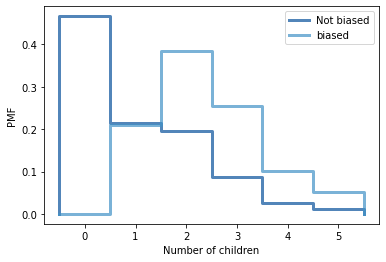

In [53]:
pmf = pmf.Copy(label='Not biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [8]:
# means

pmf.Mean()

1.024205155043831

The mean number is 1.0242

In [9]:
# biased mean
biased.Mean()

2.403679100664282

The biased number is 2.404. The difference is probably due to all the households that have zero children.

# 3.2

In [55]:
# create my own version of the built in functions:

def pmfMean(pmf):
    mean = 0
    for value in pmf:
        probability = pmf[value]
        mean += probability*value 
    return mean


def pmfVar(pmf):
    mean = pmfMean(pmf)
    variance = 0
    for value in pmf:
        probability = pmf[value]
        variance += probability*(value - mean)**2
    return variance

In [11]:
# testing all the functions now
pmfMean(pmf)

1.024205155043831

In [12]:
pmf.Mean()

1.024205155043831

In [13]:
pmfVar(pmf)

1.4128643263531195

In [14]:
pmf.Var()

1.4128643263531195

The pmfMean() and pmfVar() functions I've built yield the same results as the built in functions.

# 4.1

In [17]:
# load the data
live, firsts, others = first.MakeFrames()

In [29]:
weights = live.totalwgt_lb
weights_pmf = thinkstats2.Pmf(weights)

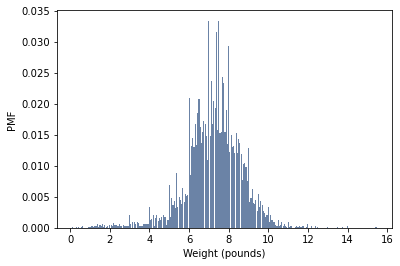

In [34]:
thinkplot.Hist(weights_pmf)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

In [35]:
# make a function to compute percentile rank
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [41]:
# compute percentile rank of my weight
my_weight = 11 # in lbs
my_percentile_rank = PercentileRank(weights_pmf,my_weight)
my_percentile_rank

89.1304347826087

This weight has a percentile rank of 89.13. Sorry mom!

# 4.2

In [42]:
# get random numbers
random_numbers = np.random.random(1000)

In [44]:
# make pmf
random_pmf = thinkstats2.Pmf(random_numbers)

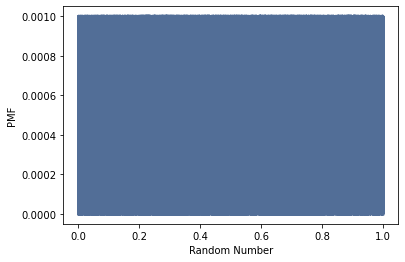

In [52]:
# plot pmf
thinkplot.pmf(random_pmf)
thinkplot.Config(xlabel='Random Number', ylabel='PMF')

In [48]:
# make cdf
random_cdf = thinkstats2.Cdf(random_numbers)

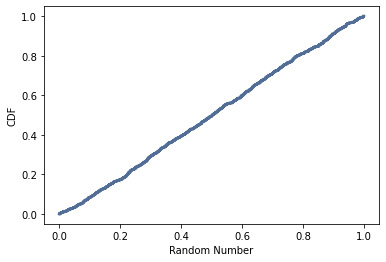

In [51]:
# plot cdf
thinkplot.cdf(random_cdf)
thinkplot.Config(xlabel='Random Number', ylabel='CDF')

The cdf shows it is uniform since it is linear. The pdf appears to show an equal probability for all values. These random numbers are uniformly random, as advertised.